In [2]:
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
import pandas as pd
import pathlib

DATA_PATH = pathlib.Path("C:/Ahsan.docx/PROJECT/MetroPT_project/MetroPT/")

In [3]:
df = pd.read_feather(DATA_PATH / "Classification.feather")
df["Target"].value_counts()
# df.head(10)

0    10539882
2      212106
1       21600
Name: Target, dtype: int64

In [4]:
X = df.drop(columns=["timestamp", "Target"]) # this is purely a classification no time steps are needed
y = df["Target"]

nm_undersampler = NearMiss(version=3, n_neighbors_ver3=3, n_jobs=-1) # Warning takes very long to run
X, y = nm_undersampler.fit_resample(X, y)

C:\Users\91770\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\91770\anaconda3\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The NearMiss or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\91770\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than 

#"nm_undersampler = NearMiss(version=3, n_neighbors_ver3=3, n_jobs=-1):"
-->This line initializes the NearMiss undersampling algorithm:

-->NearMiss is a technique used to handle imbalanced datasets (where one class has significantly more samples than the other).

-->version=3: This specifies the version of the NearMiss algorithm. Version 3 selects samples from the majority class that are closest to the minority class.

-->n_neighbors_ver3=3: This parameter controls how many neighbors to consider when selecting samples.

-->n_jobs=-1: This allows the algorithm to use all available CPU cores for faster computation.

"X, y = nm_undersampler.fit_resample(X, y):"
-->This line applies the NearMiss undersampling algorithm to balance the dataset:

-->It reduces the number of samples in the majority class to match the number of samples in the minority class.

-->The result is a balanced dataset where X (features) and y (labels) have an equal number of samples for each class.

In [5]:
# Original train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # # Further split training data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # # Print shapes to verify
print("Training set (final):", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set (final): (37976, 16) (37976,)
Validation set: (7596, 16) (7596,)
Test set: (16276, 16) (16276,)


///\\\\\\\\\This line splits the dataset (X and y) into training and testing sets using the train_test_split function from the sklearn.model_selection module.

Here's what each part does:

X: The features (independent variables) of the dataset.

y: The labels (dependent variable) of the dataset.
test_size=0.3: This specifies that 30% of the data should be used for testing, and the remaining 70% will be used for training.

random_state=42: This ensures that the split is reproducible. The same random seed (42) will always produce the same split, which is useful for debugging and consistency. Ensures that the random processes in your code (like splitting data) produce the same results every time you run it.

Output:

X_train: The features for the training set (70% of the original data).

X_test: The features for the testing set (30% of the original data).

y_train: The labels for the training set (70% of the original data).

y_test: The labels for the testing set (30% of the original data).

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

-->from sklearn.preprocessing import StandardScaler:

This line imports the StandardScaler class from the sklearn.preprocessing module.

StandardScaler is a tool used to standardize features in a dataset. Standardization transforms the data to have a mean of 0 and a standard deviation of 1, which is often necessary for many machine learning algorithms to perform well.

-->scaler = StandardScaler():

This line creates an instance of the StandardScaler class and assigns it to the variable scaler.

The scaler object will be used to apply standardization to the data.

-->X_train = scaler.fit_transform(X_train):

This line performs two steps:

fit: The scaler calculates the mean and standard deviation of the training data (X_train).

transform: The scaler applies the transformation to X_train using the calculated mean and standard deviation.

After this step, X_train is standardized (each feature has a mean of 0 and a standard deviation of 1).

In [14]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

SVC()

In [15]:
y_pred = svm.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58      6529
           1       0.60      0.61      0.61      6444
           2       0.53      0.35      0.42      3303

    accuracy                           0.56     16276
   macro avg       0.56      0.53      0.54     16276
weighted avg       0.56      0.56      0.56     16276





-->Columns:
Precision: Out of all the predictions the model made for a class, how many were correct?

Example: For class 0, precision is 0.55, meaning 55% of the predictions for class 0 were correct.

Recall: Out of all the actual instances of a class, how many did the model correctly predict?

Example: For class 0, recall is 0.62, meaning the model correctly identified 62% of the actual class 0 instances.

F1-Score: A balance between precision and recall. It’s useful when you want to consider both false positives and false negatives.

Example: For class 0, the F1-score is 0.58, which is the harmonic mean of precision and recall.

Support: The number of actual occurrences of each class in the test data.

Example: For class 0, there are 6529 instances in the test data.

-->Rows:
Class 0, 1, 2: The performance metrics for each class in your dataset.

Example: Class 0 has precision 0.55, recall 0.62, and F1-score 0.58.

Accuracy: The overall percentage of correct predictions across all classes.

Example: The model’s accuracy is 0.57, meaning it correctly predicted 57% of all instances.

Macro Avg: The average of precision, recall, and F1-score across all classes, without considering the number of instances in each class.

Example: The macro average F1-score is 0.54.

Weighted Avg: The average of precision, recall, and F1-score across all classes, weighted by the number of instances in each class.

Example: The weighted average F1-score is 0.56.

In [17]:
confusion_matrix(y_test, y_pred, normalize="true")

array([[0.62230051, 0.26849441, 0.10920509],
       [0.33286778, 0.61359404, 0.05353818],
       [0.38177414, 0.26369967, 0.35452619]])

# Performed Hyperparameter Tuning for SVM

In [29]:
# Hyperparameter Tuning for SVM
svm_params = {
    "C": [0.0001,1000],
    "kernel": ["rbf", "poly", "sigmoid", "linear"],
    "gamma": ["scale", "auto"],
}

SVM is a supervised learning algorithm used for classification tasks.

It works by finding the optimal hyperplane that separates data points into different classes.

We use the Radial Basis Function (RBF) kernel by default, but other kernels like Polynomial and Linear can also be used.

->C (Regularization Parameter):

Controls how much the model tries to fit the training data.

->Kernel (Type of Decision Boundary):

"rbf" (Radial Basis Function) → Works well for non-linear data.

"poly" (Polynomial) → Creates complex decision boundaries.

->Gamma (Influence of a Single Training Example):

"scale" → Automatically selects gamma based on dataset size.

"auto" → Uses 1 / num_features, which can lead to overfitting.

In [30]:
svm = GridSearchCV(SVC(), svm_params, cv=3, n_jobs=-1, verbose=2)
svm.fit(X_train, y_train)
best_svm = svm.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


We use GridSearchCV() to find the best SVM parameters (C, kernel, and gamma).

The model is trained using cross-validation (cv=3), which improves generalization.

Different values of SVM hyperparameters (C, kernel, gamma) affect model performance.

Tuning these parameters helps us find the best combination to improve accuracy.

Instead of manually testing different values, we use GridSearchCV(), which tries all possible combinations automatically.

In [31]:
# Evaluate SVM Model
y_pred_svm = best_svm.predict(X_test)
print("===== Results for Tuned SVM =====")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm, normalize="true"))

===== Results for Tuned SVM =====
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      6529
           1       0.72      0.74      0.73      6444
           2       0.75      0.47      0.58      3303

    accuracy                           0.69     16276
   macro avg       0.71      0.65      0.67     16276
weighted avg       0.70      0.69      0.68     16276

Confusion Matrix for SVM:
[[0.75065094 0.19160668 0.05774238]
 [0.24037865 0.73913718 0.02048417]
 [0.3402967  0.19164396 0.46805934]]


# Trying Random Forest

What is a Random Forest?

A Random Forest is an ensemble of multiple Decision Trees.

It combines the predictions of many trees to reduce overfitting.

Works well for both classification and regression tasks.

💡 Key Hyperparameters Used:

n_estimators = 200 → The number of decision trees in the forest.

max_depth = 10 → Limits tree depth to prevent overfitting.

class_weight = "balanced" → Adjusts weights so all classes get equal importance.

In [18]:
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [19]:
# Evaluate Random Forest Model
y_pred_rf = rf.predict(X_test)
print("===== Results for Random Forest =====")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf, normalize="true"))

===== Results for Random Forest =====
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      6529
           1       0.84      0.81      0.83      6444
           2       0.58      0.85      0.69      3303

    accuracy                           0.77     16276
   macro avg       0.76      0.78      0.76     16276
weighted avg       0.79      0.77      0.77     16276

Confusion Matrix for Random Forest:
[[0.69122377 0.10828611 0.20049012]
 [0.08162632 0.8078833  0.11049038]
 [0.07447775 0.07659703 0.84892522]]


# Tuned Random Forest Classifier

In [20]:
# Training Tuned Random Forest Classifier
rft = RandomForestClassifier(n_estimators=200, 
                             max_depth=10, 
                             min_samples_split=  0.0030959784653249956, 
                             min_samples_leaf = 0.0011366757909473594, 
                             max_features = "log2", 
                             class_weight="balanced", 
                             random_state=42)
rft.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2',
                       min_samples_leaf=0.0011366757909473594,
                       min_samples_split=0.0030959784653249956,
                       n_estimators=200, random_state=42)

In [21]:
# Evaluate Random Forest Model (Training set)
y_pred_rft = rft.predict(X_train)
print("===== Results for Random Forest =====")
print(classification_report(y_train, y_pred_rft))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_train, y_pred_rft, normalize="true"))

===== Results for Random Forest =====
              precision    recall  f1-score   support

           0       0.84      0.65      0.73     15071
           1       0.83      0.76      0.79     15156
           2       0.54      0.86      0.66      7749

    accuracy                           0.74     37976
   macro avg       0.74      0.76      0.73     37976
weighted avg       0.77      0.74      0.74     37976

Confusion Matrix for Random Forest:
[[0.65151616 0.11651516 0.23196868]
 [0.09158089 0.76220639 0.14621272]
 [0.0596206  0.08168796 0.85869144]]


In [22]:
# Evaluate Random Forest Model (Testing set)
y_pred_rft = rft.predict(X_test)
print("===== Results for Random Forest =====")
print(classification_report(y_test, y_pred_rft))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rft, normalize="true"))

===== Results for Random Forest =====
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      6529
           1       0.83      0.75      0.79      6444
           2       0.53      0.84      0.65      3303

    accuracy                           0.73     16276
   macro avg       0.73      0.75      0.72     16276
weighted avg       0.77      0.73      0.74     16276

Confusion Matrix for Random Forest:
[[0.65461786 0.11318732 0.23219482]
 [0.09683426 0.75217256 0.15099317]
 [0.06902816 0.08689071 0.84408114]]


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Best hyperparameter from Optuna
best_params = {'C': 0.32151444848143884,
               'class_weight': 'balanced', 
               'penalty': 'l2', 
               'max_iter': 1000
}

# Train Final Logistic Regression Model
final_model = LogisticRegression(**best_params, random_state=42)
final_model.fit(X_train, y_train)

LogisticRegression(C=0.32151444848143884, class_weight='balanced',
                   max_iter=1000, random_state=42)

In [25]:
# Make Predictions
y_pred_proba = final_model.predict_proba(X_test)
y_pred = final_model.predict(X_test)

In [26]:
# Evaluate the Model
log_loss_score = log_loss(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

In [28]:
# Print Evaluation Metrics
print("Log Loss:", log_loss_score)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred, normalize="true"))

Log Loss: 0.9497120583666985
Accuracy: 0.5086016220201524

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.35      0.44      6529
           1       0.62      0.52      0.57      6444
           2       0.38      0.79      0.51      3303

    accuracy                           0.51     16276
   macro avg       0.53      0.56      0.51     16276
weighted avg       0.56      0.51      0.50     16276


Confusion Matrix:
 [[0.3484454  0.2570072  0.3945474 ]
 [0.1994103  0.52498448 0.27560521]
 [0.09324856 0.11353315 0.79321829]]


# Trying XGBoost

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# "colsample_bytree": 0.8415906020145418,
# "reg_lambda": 0.6872093876948373,
# "learning_rate": 0.29,

# Define the best parameters you found
best_params = {
    "objective": "multi:softmax",  # or "multi:softprob"
#     "num_class": 3,
    "eval_metric": "mlogloss",
    "n_estimators": 200,
    "learning_rate": 0.01,
    "max_depth": 10,
    "min_child_weight": 6,
    "gamma": 0.065949573851835,
    "subsample": 0.8,
    "colsample_bytree": 1.0,
#     "reg_alpha":  0.5235682775088737,
    "reg_lambda":0.8,
    "grow_policy": "depthwise",
    "random_state": 42099,
}

# Initialize and train the model
xgb_model = XGBClassifier(**best_params,n_jobs= -1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.065949573851835,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [7]:
# Make predictions (Training set)
y_pred_xg = xgb_model.predict(X_train)

print("===== Results for XGBoost =====")
print(classification_report(y_train, y_pred_xg))
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_train, y_pred_xg, normalize="true"))

===== Results for XGBoost =====
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     15071
           1       0.83      0.94      0.88     15156
           2       0.89      0.67      0.77      7749

    accuracy                           0.85     37976
   macro avg       0.86      0.82      0.83     37976
weighted avg       0.85      0.85      0.85     37976

Confusion Matrix for XGBoost:
[[0.85289629 0.11386106 0.03324265]
 [0.05430193 0.93566904 0.01002903]
 [0.18182991 0.14414763 0.67402245]]


In [8]:
# Make predictions (Testing set)
y_pred_xg = xgb_model.predict(X_test)

print("===== Results for XGBoost =====")
print(classification_report(y_test, y_pred_xg))
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xg, normalize="true"))

===== Results for XGBoost =====
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6529
           1       0.82      0.92      0.86      6444
           2       0.83      0.62      0.71      3303

    accuracy                           0.82     16276
   macro avg       0.82      0.79      0.80     16276
weighted avg       0.82      0.82      0.82     16276

Confusion Matrix for XGBoost:
[[0.82707919 0.12237709 0.05054373]
 [0.07014277 0.91666667 0.01319056]
 [0.21737814 0.15985468 0.62276718]]


Precision: How many of the predicted positives are actually positive.

Recall: How many of the actual positives are correctly predicted.

F1-score: The harmonic mean of precision and recall, balancing the two.

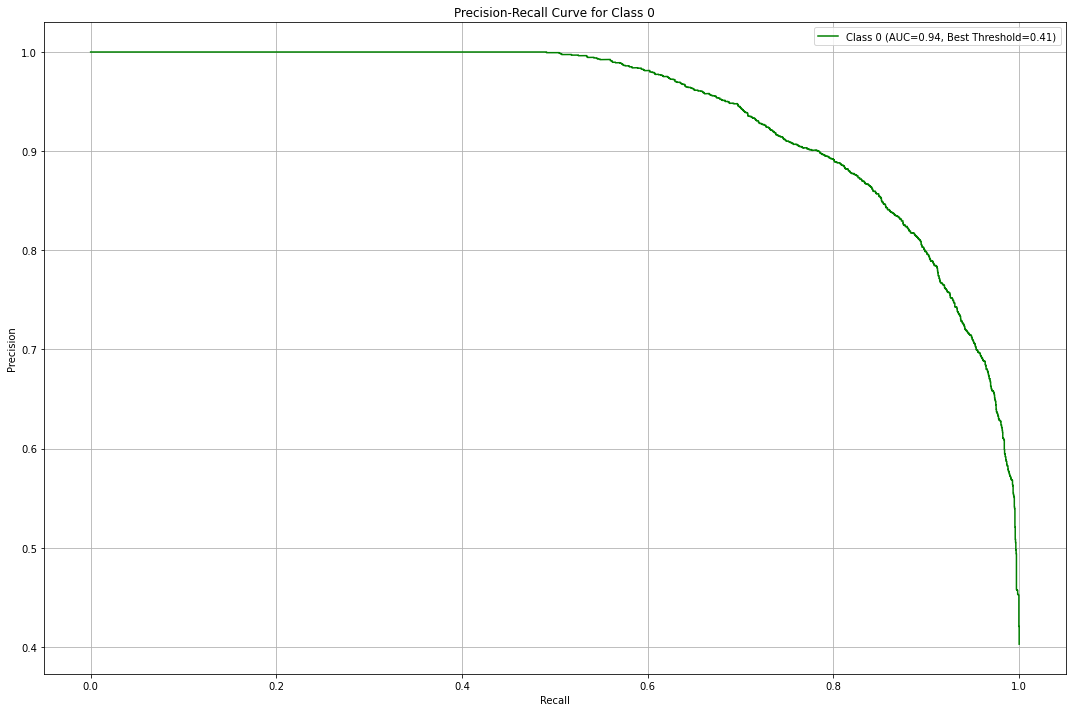

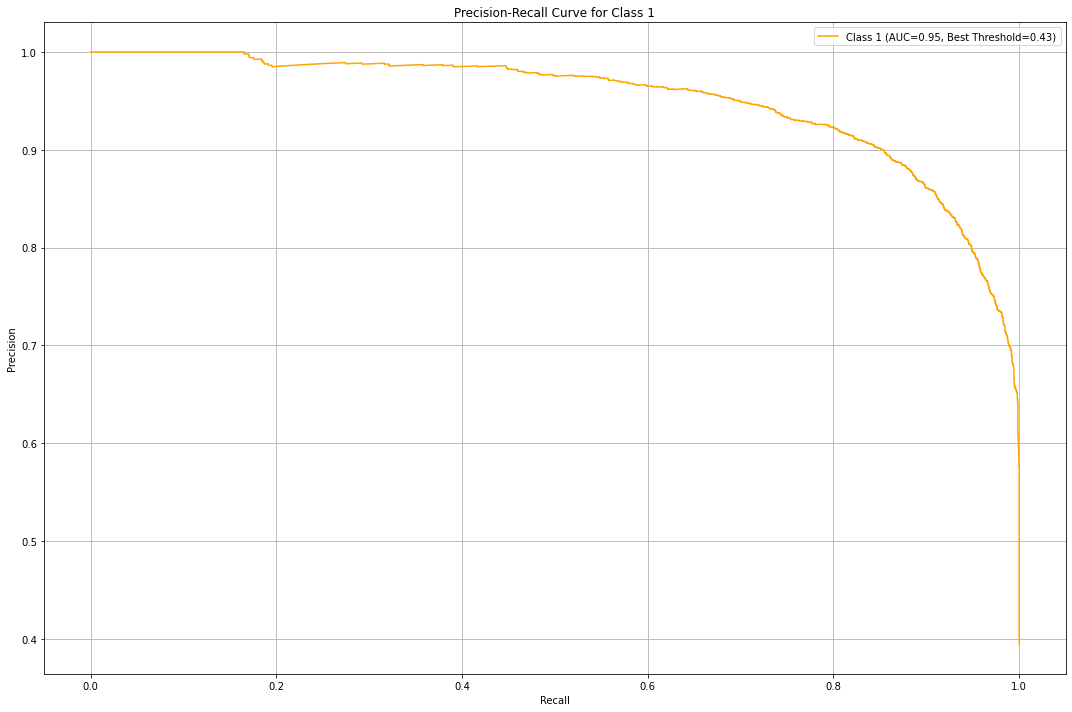

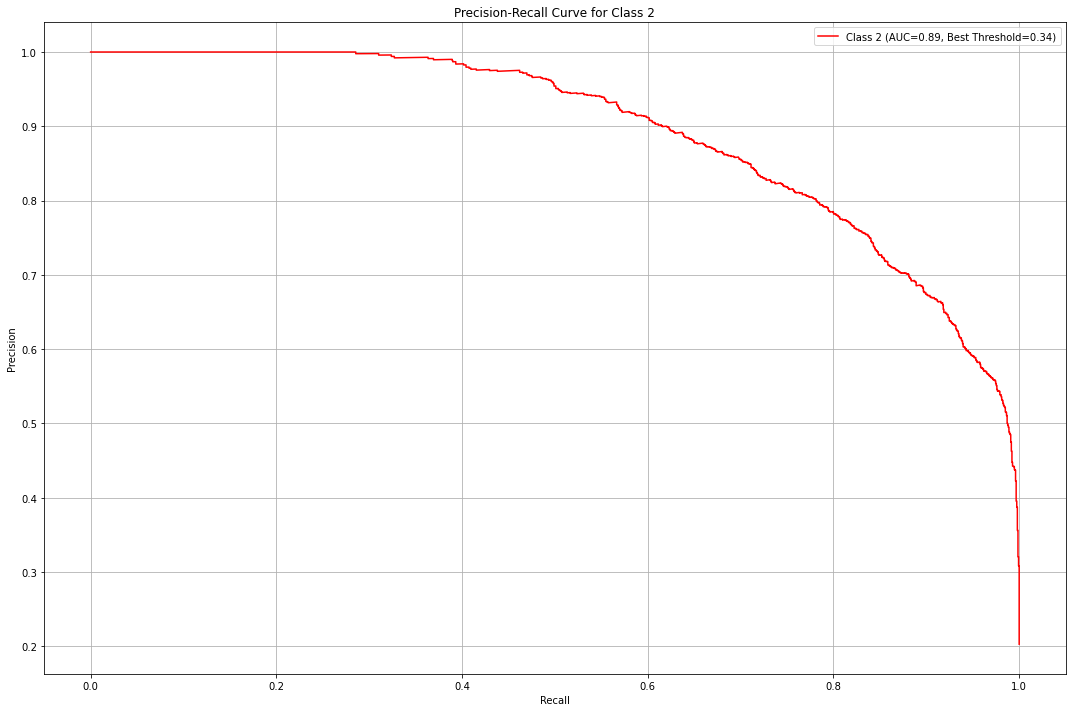

Best Thresholds per Class: {0: 0.41389936, 1: 0.43027887, 2: 0.3351662}


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, auc

# predicted probabilities from XGBoost
y_prob = xgb_model.predict_proba(X_val)  # Shape (n_samples, 3)
y_true = y_val  # True labels (0, 1, 2)

# Store best thresholds for each class
best_thresholds = {}

# Define colors for each class
colors = ['green', 'orange', 'red']

for class_idx in range(3):
    # Create a new figure for each class
    plt.figure(figsize=(15, 10))  # Adjust the figure size to fit well in the notebook

    precision, recall, thresholds = precision_recall_curve(y_true == class_idx, y_prob[:, class_idx])
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero

    # Find best threshold (max F1-score)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    best_thresholds[class_idx] = best_threshold

    # Calculate AUC for the Precision-Recall curve
    auc_score = auc(recall, precision)

    # Plot Precision-Recall Curve with specific color and AUC in the label
    plt.plot(recall, precision, label=f'Class {class_idx} (AUC={auc_score:.2f}, Best Threshold={best_threshold:.2f})', color=colors[class_idx])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for Class {class_idx}')
    plt.legend()
    plt.grid()
    plt.tight_layout()  # Ensure the plot fits well in the notebook
    plt.show()  # Display the plot for the current class

# Print Best Thresholds
print("Best Thresholds per Class:", best_thresholds)

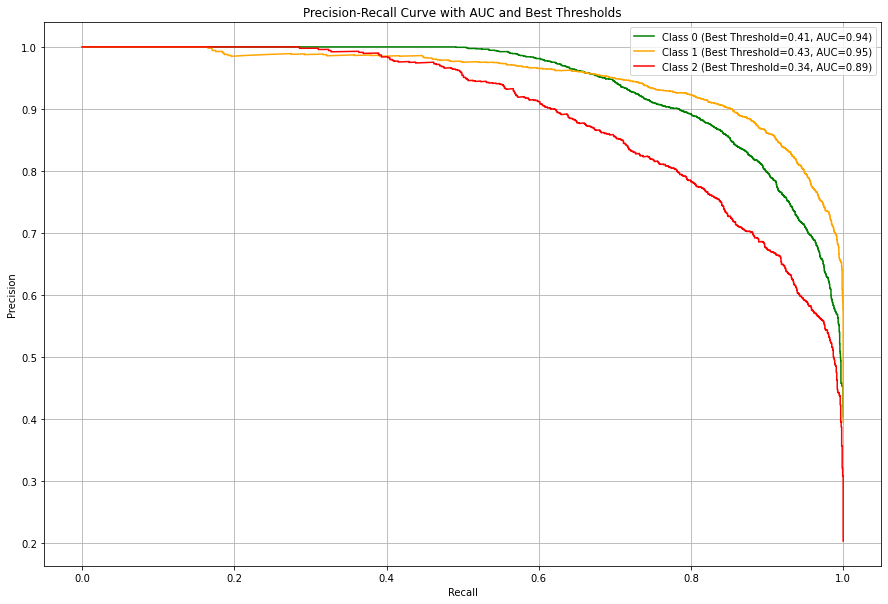

Best Thresholds per Class: {0: 0.41389936, 1: 0.43027887, 2: 0.3351662}
AUC Scores per Class: {0: 0.9410388822605611, 1: 0.9501310359884384, 2: 0.8911594956828703}


In [12]:
# predicted probabilities from XGBoost
y_prob = xgb_model.predict_proba(X_val)  # Shape (n_samples, 3)
y_true = y_val  # True labels (0, 1, 2)

# Store best thresholds and AUC for each class
best_thresholds = {}
auc_scores = {}

plt.figure(figsize=(15, 10))

# Define colors for each class
colors = ['green', 'orange', 'red']

for class_idx in range(3):
    precision, recall, thresholds = precision_recall_curve(y_true == class_idx, y_prob[:, class_idx])
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero

    # Find best threshold (max F1-score)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    best_thresholds[class_idx] = best_threshold

    # Calculate AUC for Precision-Recall Curve
    auc_score = auc(recall, precision)
    auc_scores[class_idx] = auc_score

    # Plot Precision-Recall Curve with specific color
    plt.plot(recall, precision, label=f'Class {class_idx} (Best Threshold={best_threshold:.2f}, AUC={auc_score:.2f})', color=colors[class_idx])

# Final Plot Formatting
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with AUC and Best Thresholds')
plt.legend()
plt.grid()
plt.show()

# Print Best Thresholds and AUC Scores
print("Best Thresholds per Class:", best_thresholds)
print("AUC Scores per Class:", auc_scores)


AUC stands for Area Under the Curve. It is a metric used to evaluate the performance of a classification model. Specifically, it measures how well the model can distinguish between different classes (e.g., positive vs. negative). The "curve" in AUC usually refers to the ROC curve (Receiver Operating Characteristic curve) or the Precision-Recall curve.

ROC Curve: Plots the True Positive Rate (Recall) against the False Positive Rate.

Precision-Recall Curve: Plots Precision against Recall.